![Los Angeles skyline](../../archivos/la_skyline.jpg)

Los Angeles, California 😎. The City of Angels. Tinseltown. The Entertainment Capital of the World! 

Known for its warm weather, palm trees, sprawling coastline, and Hollywood, along with producing some of the most iconic films and songs. However, as with any highly populated city, it isn't always glamorous and there can be a large volume of crime. That's where you can help!

You have been asked to support the Los Angeles Police Department (LAPD) by analyzing crime data to identify patterns in criminal behavior. They plan to use your insights to allocate resources effectively to tackle various crimes in different areas.

## The Data

They have provided you with a single dataset to use. A summary and preview are provided below.

It is a modified version of the original data, which is publicly available from Los Angeles Open Data.

# crimes.csv

| Column     | Description              |
|------------|--------------------------|
| `'DR_NO'` | Division of Records Number: Official file number made up of a 2-digit year, area ID, and 5 digits. |
| `'Date Rptd'` | Date reported - MM/DD/YYYY. |
| `'DATE OCC'` | Date of occurrence - MM/DD/YYYY. |
| `'TIME OCC'` | In 24-hour military time. |
| `'AREA NAME'` | The 21 Geographic Areas or Patrol Divisions are also given a name designation that references a landmark or the surrounding community that it is responsible for. For example, the 77th Street Division is located at the intersection of South Broadway and 77th Street, serving neighborhoods in South Los Angeles. |
| `'Crm Cd Desc'` | Indicates the crime committed. |
| `'Vict Age'` | Victim's age in years. |
| `'Vict Sex'` | Victim's sex: `F`: Female, `M`: Male, `X`: Unknown. |
| `'Vict Descent'` | Victim's descent:<ul><li>`A` - Other Asian</li><li>`B` - Black</li><li>`C` - Chinese</li><li>`D` - Cambodian</li><li>`F` - Filipino</li><li>`G` - Guamanian</li><li>`H` - Hispanic/Latin/Mexican</li><li>`I` - American Indian/Alaskan Native</li><li>`J` - Japanese</li><li>`K` - Korean</li><li>`L` - Laotian</li><li>`O` - Other</li><li>`P` - Pacific Islander</li><li>`S` - Samoan</li><li>`U` - Hawaiian</li><li>`V` - Vietnamese</li><li>`W` - White</li><li>`X` - Unknown</li><li>`Z` - Asian Indian</li> |
| `'Weapon Desc'` | Description of the weapon used (if applicable). |
| `'Status Desc'` | Crime status. |
| `'LOCATION'` | Street address of the crime. |

In [10]:
# Re-run this cell
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Obtener la ruta del archivo
base_path = os.getcwd()
ruta_archivo = os.path.join(base_path, "..", "..", "Archivos", "crimes.csv")
ruta_archivo = os.path.normpath(ruta_archivo) 


crimes = pd.read_csv(ruta_archivo, parse_dates=['Date Rptd', 'DATE OCC'], dtype={"TIME OCC": str} )
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
3,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV
4,220213256,2022-07-14,2020-07-14,0900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST


In [11]:
crimes.shape

(185715, 12)

In [12]:
crimes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185715 entries, 0 to 185714
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   DR_NO         185715 non-null  int64         
 1   Date Rptd     185715 non-null  datetime64[ns]
 2   DATE OCC      185715 non-null  datetime64[ns]
 3   TIME OCC      185715 non-null  object        
 4   AREA NAME     185715 non-null  object        
 5   Crm Cd Desc   185715 non-null  object        
 6   Vict Age      185715 non-null  int64         
 7   Vict Sex      185704 non-null  object        
 8   Vict Descent  185705 non-null  object        
 9   Weapon Desc   73502 non-null   object        
 10  Status Desc   185715 non-null  object        
 11  LOCATION      185715 non-null  object        
dtypes: datetime64[ns](2), int64(2), object(8)
memory usage: 17.0+ MB


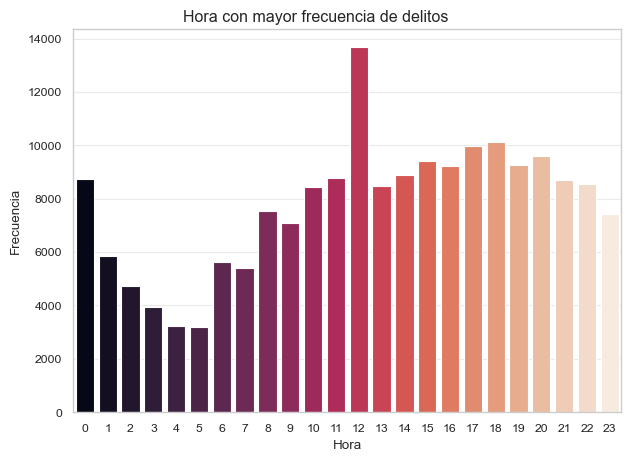

In [13]:
# --------------- 1. Hora mayor frecuencia de delitos -------------------------------------

# 1.1 Creando una columna con la hora que se cometio el delito
crimes['HOUR OCC'] = crimes['TIME OCC'].str[:2].astype(int)

# 1.2 Gráfico de hora con mayor frecuencia de delitos
sns.set_context("paper")
sns.set_style("whitegrid")
g = sns.countplot(
                 data=crimes, 
                 x='HOUR OCC', 
                 hue='HOUR OCC',          # Misma variable que x (Para quitar el error de palette se agrego hue)
                 palette='rocket',
                 legend=False             # Oculta la leyenda redundante
                 )
g.figure.suptitle('Hora con mayor frecuencia de delitos', y=0.95)
g.set(
    xlabel='Hora',
    ylabel='Frecuencia'
)

plt.grid(axis='y', alpha=0.4)  # Líneas de grid horizontales tenues
plt.tight_layout()



In [14]:
# 1.3 Hora con mayor frecuencia de crimenes
peak_crime_hour = crimes['HOUR OCC'].value_counts().idxmax()

print(f"La hora con más crímenes es: {peak_crime_hour}")

La hora con más crímenes es: 12


In [15]:
# ----------------------- 2. Area con mayor frecuencia de delitos nocturnos ---------------------


# 2.1 Creando Dataframe de crimenes comentido en las horas 10 pm hasta 3 am
delitos_nocturnos = crimes[crimes['HOUR OCC'].isin([22, 23, 0, 1, 2, 3])]

# 2.2 Cuenta el numero de delitos por Area y devuelve la zona con mas numero de asaltos
peak_night_crime_location = (delitos_nocturnos.groupby('AREA NAME')
                                .size()
                                .sort_values(ascending=False)
                                .index[0] 
                             )


print(f"Área con mayor frecuencia de delitos nocturnos: {peak_night_crime_location}") 

Área con mayor frecuencia de delitos nocturnos: Central


In [16]:
# -------- 3. Identificar el número de delitos cometidos contra victimas por grupos de edad

# 3.1 Definiendo los limites de edad (bins)
age_bins = [0, 17, 25, 34, 44, 54, 64, float('inf')]

# 3.2 Creando los labels de cada categoria
victim_labels = ["0-17", "18-25", "26-34", "35-44", "45-54", "55-64", "65+"]

# 3.3 Realizar la clasificación de las victimas por edad
crimes['Age Bracket'] = pd.cut(
    crimes['Vict Age'],
    bins=age_bins,
    labels=victim_labels
)


In [17]:
# 3.4 Conteo de los delitos cometido por grupo

victim_ages = crimes['Age Bracket'].value_counts().rename('Cantidad')
victim_ages

Age Bracket
26-34    47470
35-44    42157
45-54    28353
18-25    28291
55-64    20169
65+      14747
0-17      4528
Name: Cantidad, dtype: int64

[Text(0.5, 0, 'Grupo de Edades'), Text(0, 0.5, 'Frecuencia')]

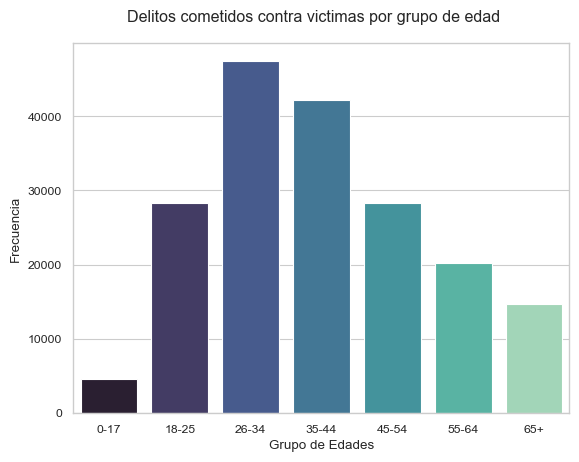

In [18]:
# 3.5 Grafico de delitos cometidos por victimas por grupo de edad
g = sns.barplot(
    x=victim_ages.index, 
    y=victim_ages.values,
    hue=victim_ages.index,    # Misma variable que x (Para quitar el error de palette se agrego hue)
    palette='mako',    
    legend=False               # Oculta la leyenda redundante   
    )
g.figure.suptitle('Delitos cometidos contra victimas por grupo de edad', y='0.95')
g.set(
    xlabel='Grupo de Edades',
    ylabel='Frecuencia'
)